In [133]:
from collections import namedtuple
from functools import partial, wraps
import json
import redis
from datetime import datetime, timedelta
import yaml
from wechatpy.exceptions import WeChatClientException, APILimitedException
from PIL import Image, ImageDraw, ImageFont
import timeit

In [2]:
import requests
from pprint import pprint
from IPython.display import JSON

In [150]:
base_url = 'https://store.11train.com/api/v1'
token_format = '{phone_number}:{sms_code}'

In [159]:
r = requests.get(base_url + '/store/health')
r.json()

{'msg': 'Hello 11train!'}

In [44]:
admin_header = {}

In [151]:
phone_number = '18688967466'

In [152]:
r = requests.post(base_url + '/user/admin_login/' + phone_number)
pprint(r.json())

{'msg': '短信已发送, 请注意查收.', 'token_format': '{phone_number}:{sms_code}'}


In [153]:
sms_code = '977323'     # 查看手机
admin_header = {
    'token': token_format.format(phone_number=phone_number, sms_code=sms_code)
}
pprint(admin_header)

{'token': '18688967466:977323'}


In [155]:
template_id = 1
url = base_url + '/codebase/templates/{template_id}/apps'.format(template_id=template_id)
# params里面的参数是可选的, 当app_id有设置的话, 那么限制在列表内, 列表字符串用逗号分割,不要加空格. released默认是1, 也是限制已经上线的, 输入其他数值, 就不做限制了.
params = {
    'app_id':'wxa2133d52d24860d0',
   'released': 0
}
r = requests.get(url, headers=admin_header, params=params)
JSON(r.json(), expanded=True)

<IPython.core.display.JSON object>

In [157]:
template_id = 1
url = base_url + '/codebase/templates/{template_id}/apps/actions/check_info'.format(template_id=template_id)
# params里面的参数是可选的, 当app_id有设置的话, 那么限制在列表内, 列表字符串用逗号分割,不要加空格. released默认是1, 也是限制已经上线的, 输入其他数值, 就不做限制了.
params = {
    'app_id':'wxa2133d52d24860d0',
   'released': 0
}
r = requests.post(url, headers=admin_header, params=params)
JSON(r.json(), expanded=True)

<IPython.core.display.JSON object>

In [172]:
template_id = 1
url = base_url + '/codebase/templates/{template_id}/apps/qrcode/check_in_cover'.format(template_id=template_id)
# params里面的参数是可选的, 当app_id有设置的话, 那么限制在列表内, 列表字符串用逗号分割,不要加空格. released默认是1, 也是限制已经上线的, 输入其他数值, 就不做限制了.
params = {
    'app_id':'wx637060af75ab7cb7',
   'released': 0
}
r = requests.post(url, headers=admin_header, params=params)
JSON(r.json(), expanded=True)

<IPython.core.display.JSON object>

In [103]:
import concurrent.futures
import urllib.request

URLS = ['http://www.foxnews.com/',
        'http://www.cnn.com/',
        'http://europe.wsj.com/',
        'http://www.bbc.co.uk/',
        'http://some-made-up-domain.com/']

# Retrieve a single page and report the URL and contents
def load_url(url, timeout):
    with urllib.request.urlopen(url, timeout=timeout) as conn:
        return conn.read()

# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    # Start the load operations and mark each future with its URL
    future_to_url = [executor.submit(load_url, url, 60): url for url in URLS]
    for future in concurrent.futures.as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:
            print('%r generated an exception: %s' % (url, exc))
        else:
            print('%r page is %d bytes' % (url, len(data)))

SyntaxError: invalid syntax (<ipython-input-103-bdcca7b0ad35>, line 18)

In [102]:
import concurrent.futures
import urllib.request
from datetime import datetime

URLS = ['http://www.baidu.com/',
        'http://www.qq.com/',
        'http://www.jd.com/',
        'http://www.tmall.com/',
        'http://www.taobao.com/']

# Retrieve a single page and report the URL and contents
def load_url(url, timeout):
    with urllib.request.urlopen(url, timeout=timeout) as conn:
        return conn.read()

# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    # Start the load operations and mark each future with its URL
    future_to_url = {executor.submit(load_url, url, 60): url for url in URLS}
    for future in concurrent.futures.as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:
            print('%r generated an exception: %s' % (url, exc))
        else:
            print(str(datetime.now()), '%r page is %d bytes' % (url, len(data)))

2018-08-25 08:53:02.328536 'http://www.baidu.com/' page is 118285 bytes
2018-08-25 08:53:02.431328 'http://www.jd.com/' page is 118807 bytes
2018-08-25 08:53:02.440384 'http://www.qq.com/' page is 49057 bytes
2018-08-25 08:53:02.621317 'http://www.taobao.com/' page is 144407 bytes
2018-08-25 08:53:02.631481 'http://www.tmall.com/' page is 229600 bytes


In [104]:
from concurrent import futures

In [119]:

# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    # Start the load operations and mark each future with its URL
    f0 = executor.submit(load_url, URLS[0], 60)
    f1 = executor.submit(load_url, URLS[1], 60)
    f2 = executor.submit(load_url, URLS[2], 60)
    f3 = executor.submit(load_url, URLS[3], 60)
    f4 = executor.submit(load_url, URLS[4], 60)
    future_to_url = {f0: '0', f1: '1', f2: '2', f3: '3', f4:'4'}
    finished, pending = futures.wait(
                future_to_url,
                return_when=futures.ALL_COMPLETED)
    
    
#      print(str(datetime.now()), '%r page is %d bytes' % (url, len(data)))

In [120]:
for f in finished:
    data = f.result()
    print(future_to_url[f])
    print(len(data))


2
118852
3
229595
0
118432
4
144407
1
49188


In [121]:
client

In [123]:
scene = 'a&a'

In [125]:
r = client.wxa.get_wxa_code_unlimited(scene)

In [129]:
%pwd

'/home/jovyan/work/notebook'

In [143]:
r.status_code

200

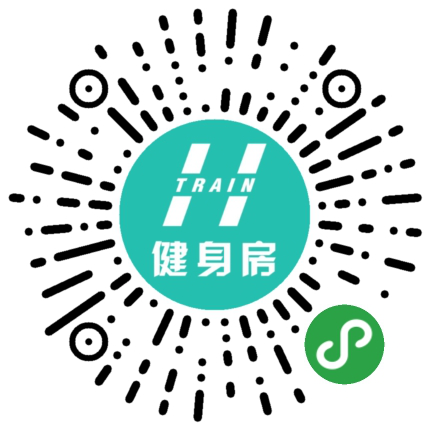

In [148]:
from io import BytesIO
Image.open(BytesIO(r.content))

In [130]:
path = '/home/jovyan/work/notebook/qr.jpg'
if r.status_code == 200:
    with open(path, 'wb') as f:
        f.write(r.content)

In [1]:
%pwd

'/home/jovyan/work/notebook'

In [2]:
from datetime import datetime

In [3]:
t = datetime(year=2018, month=10, day=15, hour=11, minute=57, second=0)

In [4]:
now = datetime.now()

In [5]:
t 

datetime.datetime(2018, 10, 15, 11, 57)

In [6]:
now

datetime.datetime(2018, 10, 15, 3, 55, 20, 641785)

In [7]:
t> now

True

In [3]:
import requests

In [7]:
data = {
    'Message': '{"biz_hid": "test", "brief": "hello"}'
}

In [27]:
url = 'http://ws.11train.com/customer_arrived'

In [36]:
r = requests.post(url, json=data)

In [34]:
r

<Response [405]>